<h1>104人力銀行職缺內容抓取</h1>

In [95]:
import job104_spider

data = job104_spider.get_job_context('數據分析',18)

data.head(5)


,職務名稱,工作內容,職務類別,學歷要求,工作經歷,工作技能,擅長工具,其他條件
0,數據分析師,庫柏資訊是台灣資安產品的領導者，應徵者將會加入我們軟體產品的研發團隊，應徵者需要瞭解公司的軟...,統計學研究員、網路安全分析師、市場調查／市場分析,大學以上,2年以上,市場調查資料分析與報告撰寫、統計軟體操作、調查樣本統計分析,Tableau、Google Analytics、Power BI​、SAS,
1,數據分析師,1. 透過使用者研究、蒐集團隊回饋、競爭者分析等多項管道進行數據分析，作為公司營運、行銷策略...,市場調查／市場分析、統計精算人員、金融研究員,專科以上,3年以上,,Python、R、MS SQL、Excel、PowerPoint,1. 具金融或電商產業相關經驗者尤佳\n2. 具備3年以上用戶數據分析經驗\n3. 具備良好...
2,數據分析師,1.\t需求訪談、數據分析專案導入、數據分析應用\n2.\t營運數據統計分析、資訊視覺化\n...,系統分析師、其他資訊專業人員、統計精算人員,大學以上,不拘,,Tableau、Power BI​,具視覺化工具經驗者佳，如 Tableau、Power BI\n
3,數據分析師,"【工作摘要】\n〔Data Engineer〕\n- Develop, operate, a...",演算法開發工程師、系統分析師、資料庫管理人員,大學以上,不拘,,Python、Tableau,（一）專業要求：\n- Data mining and machine learning a...
4,數據分析師,***應徵時請附上作品集、文案、自傳、證照等加分文件***\r\n1.\t需求分析及規劃資料...,市場調查／市場分析、統計精算人員,碩士以上,不拘,,C、C#、C++、Java、Matlab、Python、R、Excel、PowerPoint,1.\t有使用R、Tableau、PowerBi、Google Data Studio、Go...


<h1>資料分析</h1>

In [96]:
from collections import Counter
import pandas as pd
import numpy as np

#職務類別排名

data['職務類別2'] = data.職務類別.apply(lambda x: x.split('、')) #分詞
category_test = data.職務類別2
category_cnt = Counter([word for sent in category_test for word in sent])  # 計算次數
category_fre_most=category_cnt.most_common(10) #顯示前10名最常出現的詞

Job_category_df=pd.DataFrame({'職務類別': [key for key, values in category_fre_most],
              '出現次數': [values for key, values in category_fre_most]},index=np.arange(1,11))

#工作技能排名

data['工作技能2'] = data.工作技能.apply(lambda x: x.split('、'))
Job_ability_text = data.工作技能2
Job_ability_text_cnt = Counter([word for sent in Job_ability_text for word in sent])  # 計算次數
del Job_ability_text_cnt['']
Job_ability_fre_most=Job_ability_text_cnt.most_common(10)

Job_ability_df=pd.DataFrame({'工作技能': [key for key, values in Job_ability_fre_most],
              '出現次數': [values for key, values in Job_ability_fre_most]},index=np.arange(1,11))

df_concat=pd.concat([Job_category_df,Job_ability_df],axis=1)
df_concat

,職務類別,出現次數,工作技能,出現次數
1,市場調查／市場分析,126,軟體程式設計,18
2,軟體設計工程師,82,資料庫軟體應用,17
3,系統分析師,80,提案與簡報技巧,13
4,統計精算人員,70,行銷策略擬定,13
5,資料庫管理人員,56,資料庫程式設計,12
6,演算法開發工程師,51,網路活動規劃與執行,11
7,其他資訊專業人員,43,軟體工程系統開發,11
8,行銷企劃人員,40,系統整合分析,11
9,統計學研究員,33,市場調查資料分析與報告撰寫,10
10,Internet程式設計師,21,資料庫系統管理維護,10


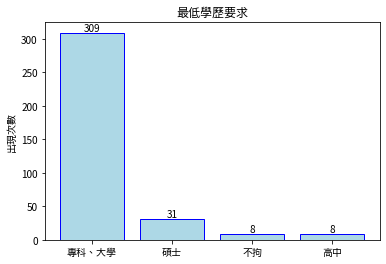

In [97]:
#最低學歷要求分布

def Education_require(sentence):
    
    if '不拘' in sentence:
        return '不拘'

    elif '高中' in sentence:
        return '高中'

    elif '專科' in sentence or '大學' in sentence:    
        return '專科、大學'
    
    elif '碩士' in sentence:
        return '碩士'
    
    elif '博士' in sentence:
        return '博士'

data['最低學歷要求']=data.學歷要求.apply(lambda x :Education_require(x))


#最低學歷要求分布長條圖

import numpy as np
import matplotlib.pyplot as plt
 
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] 
height = data.最低學歷要求.value_counts().values
bars = data.最低學歷要求.value_counts().index
x_pos = np.arange(len(bars))

plt.title('最低學歷要求')
plt.bar(x_pos, height, color='lightblue',  edgecolor='blue')
plt.xticks(x_pos, bars)
plt.ylabel('出現次數')

for x, y in enumerate(height):
    plt.text(x, y, '%s' % y, ha='center',va='bottom')

plt.show()
     

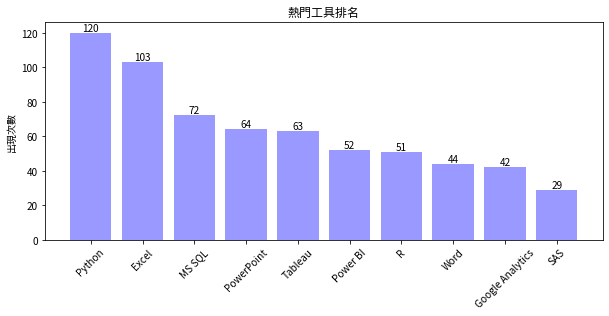

In [98]:
import jieba
from collections import Counter

data['擅長工具'] = data.擅長工具.apply(lambda x: x.replace(u'\u200b', '').replace(u'u3000','')) #刪除特殊字符
data['擅長工具2'] = data.擅長工具.apply(lambda x: x.split('、'))  #分詞
tool_text = data.擅長工具2
tool_cnt = Counter([word for sent in tool_text for word in sent])  # 計算次數
del tool_cnt['']
tool_fre_most=tool_cnt.most_common(10) #前10名最常出現的詞
 
#熱門工具排行長條圖

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
height = [values for key, values in tool_fre_most]
bars = [key for key, values in tool_fre_most]
x_pos = np.arange(len(bars))
plt.figure(figsize=(10, 4))
plt.title('熱門工具排名')
plt.bar(x_pos, height, color='#9999FF')
plt.xticks(x_pos, bars, rotation=45)
plt.ylabel('出現次數')

for x, y in enumerate(height):
    plt.text(x, y, '%s' % y, ha='center',va='bottom')

plt.show()


In [99]:
#使用關聯規則找出容易同時需要具備的工具

from mlxtend.preprocessing import TransactionEncoder    #編碼器
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

te = TransactionEncoder()
te_ary = te.fit(data['擅長工具2']).transform(data['擅長工具2'])
tool_df = pd.DataFrame(te_ary, columns=te.columns_)
tool_df.head(5)


frequent_items = apriori(tool_df, min_support=0.1, use_colnames=True)   #min_support為0.1
association_df = association_rules(frequent_items,metric='confidence', min_threshold=0.3).sort_values(by='confidence', ascending=False)[
    ['antecedents', 'consequents', 'support', 'confidence', 'lift']].reset_index(drop=True) #min_confidence為0.3

association_df

,antecedents,consequents,support,confidence,lift
0,(PowerPoint),(Excel),0.179775,1.000000,3.456311
1,(Word),(Excel),0.123596,1.000000,3.456311
2,(Word),(PowerPoint),0.123596,1.000000,5.562500
3,"(PowerPoint, Word)",(Excel),0.123596,1.000000,3.456311
4,"(Word, Excel)",(PowerPoint),0.123596,1.000000,5.562500
5,(Word),"(PowerPoint, Excel)",0.123596,1.000000,5.562500
6,(R),(Python),0.140449,0.980392,2.908497
7,(PowerPoint),(Word),0.123596,0.687500,5.562500
8,"(PowerPoint, Excel)",(Word),0.123596,0.687500,5.562500
9,(PowerPoint),"(Word, Excel)",0.123596,0.687500,5.562500


Building prefix dict from c:\Users\cg983\OneDrive\桌面\104工作分析\dict.txt.big ...
Loading model from cache C:\Users\cg983\AppData\Local\Temp\jieba.ue12dc4ae57da1b2cf4edc6c8f14120dc.cache
Loading model cost 0.729 seconds.
Prefix dict has been built succesfully.


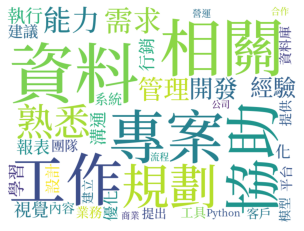

In [100]:
#文字雲

import jieba
import re

stopwords = [k.strip() for k in open('停用詞.txt', encoding='utf-8') if k.strip() != '']    #停用詞

jieba.set_dictionary('dict.txt.big')  # 繁體中文檔

#將工具的專有名詞加入自定義詞
for keys in tool_cnt.keys():
    jieba.add_word(keys)

#刪除標標點符號
def clean_Punctuation(text):
    text=re.sub(r'[^\w\s]','',text) #刪除標標點符號
    text=text.replace('\n','').replace('\r','').replace('\t','').replace(' ','').replace('[','').replace(']','')
    return text
#斷詞/去除標點符號/去除停用字
def text_cut(sentence):
    sentence_cut=[word for word in jieba.lcut(clean_Punctuation(sentence)) if word not in stopwords]

    return sentence_cut

job_content= data.工作內容 
job_content_cut=[word for sent in job_content for word in set(text_cut(sent)) if word not in '數據分析']  #斷詞
job_content_cut_cnt=Counter([word for word in job_content_cut])   #計算次數

#文字雲作圖

import wordcloud # 詞雲展示庫
from PIL import Image # 影像處理庫
import matplotlib.pyplot as plt # 影像展示庫


#根據單詞及其頻率生成詞雲
wc = wordcloud.WordCloud(
    font_path='NotoSerifCJKtc-Medium.otf', # 設定字型格式
    max_words=40, # 最多顯示詞數
    max_font_size=180, # 字型最大值
    background_color='white',
    width=800, height=600,
)

wc.generate_from_frequencies(job_content_cut_cnt) # 從字典生成詞雲
plt.imshow(wc) # 顯示詞雲
plt.axis('off') # 關閉座標軸
plt.show() # 顯示影像


In [101]:
#主題分析

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 將字串切割後依照逗點分割
data['工作內容2'] = data.工作內容.apply(lambda x: str(text_cut(x)).replace(
    '[', '').replace(']"', '').replace(',', '').replace('\'', ''))

     
data['其他條件2'] = data.其他條件.apply(lambda x: str(text_cut(x)).replace(
    '[', '').replace(']"', '').replace(',', '').replace('\'', ''))

#模型訓練
tf_vectorizer = CountVectorizer(strip_accents='unicode',
                                max_df=0.5,
                                min_df=10)  
tf = tf_vectorizer.fit_transform(data['工作內容2'])

lda = LatentDirichletAllocation(n_components=3, max_iter=50,    #n_components=5/分成五個主題
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

lda.fit(tf)

def print_topic(feature_names, n_top_words):
    for topic_idx, topic in enumerate(lda.components_):

        print("主題 %d:" % (topic_idx+1))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()
    
tf_feature_names = tf_vectorizer.get_feature_names()
print_topic(tf_feature_names, 20)

主題 1:
行銷 資料 建議 團隊 協助 規劃 提出 優化 會員 商業 透過 數位 產品 專案 經驗 產業 提供 營運 活動 經營

主題 2:
廣告 數位 網路 客戶 建置 規劃 策略 行銷 優化 監控 提升 中心 操作 服務 網站 相關 資料 系統 平台 廣告投放

主題 3:
資料 相關 經驗 工作 開發 能力 專案 熟悉 管理 學習 需求 具備 協助 報表 工具 溝通 資料庫 設計 客戶 python

